DATA ANALYSIS 

In [6]:
!pip install pandas numpy matplotlib seaborn


  Using cached pandas-2.3.1-cp311-cp311-macosx_10_9_x86_64.whl (11.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 3.7 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 6.7 MB/s eta 0:00:0000:0100:01m
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 kB 6.5 MB/s eta 0:00:0000:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.6 MB/s eta 0:00:00:00:0100:01
  Using cached kiwisolver-1.4.8-cp311-cp311-macosx_10_9_x86_64.whl (66 kB)
  Using cached pillow-11.3.0-cp311-cp311-macosx_10_10_x86_64.whl (5.3 MB)
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df= pd.read_csv('Data/Dataset .csv')

In [14]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [15]:
df.duplicated().sum()



np.int64(0)

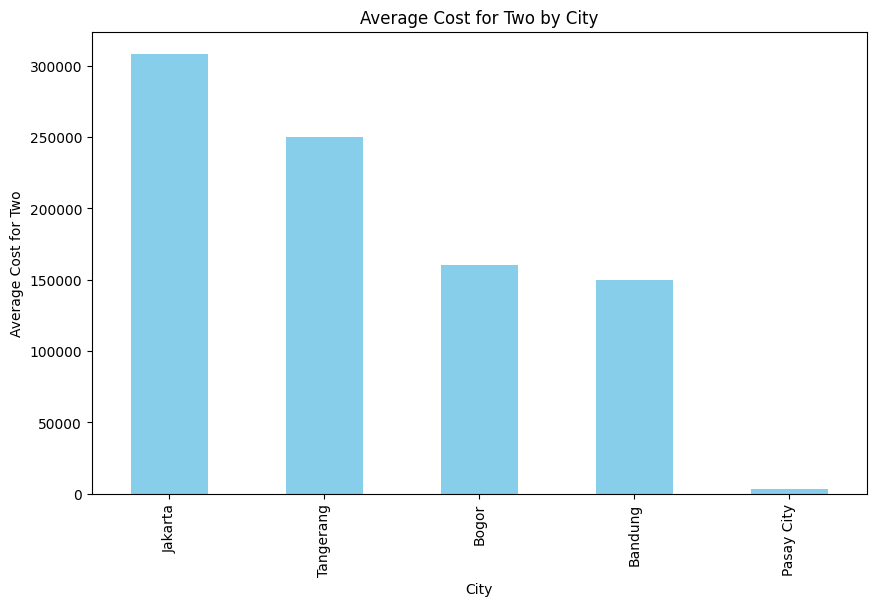

In [16]:
df.columns
df.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False).head().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Cost for Two by City')
plt.xlabel('City')
plt.ylabel('Average Cost for Two')
plt.show()

In [20]:
data=df.groupby('Cuisines')['Votes'].sum().reset_index()
data[data["Votes"]!=0]

,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
5,"African, Portuguese",265
...,...,...
1820,"Western, Asian, Cafe",259
1821,"Western, Fusion, Fast Food",32
1822,World Cuisine,95
1823,"World Cuisine, Mexican, Italian",115


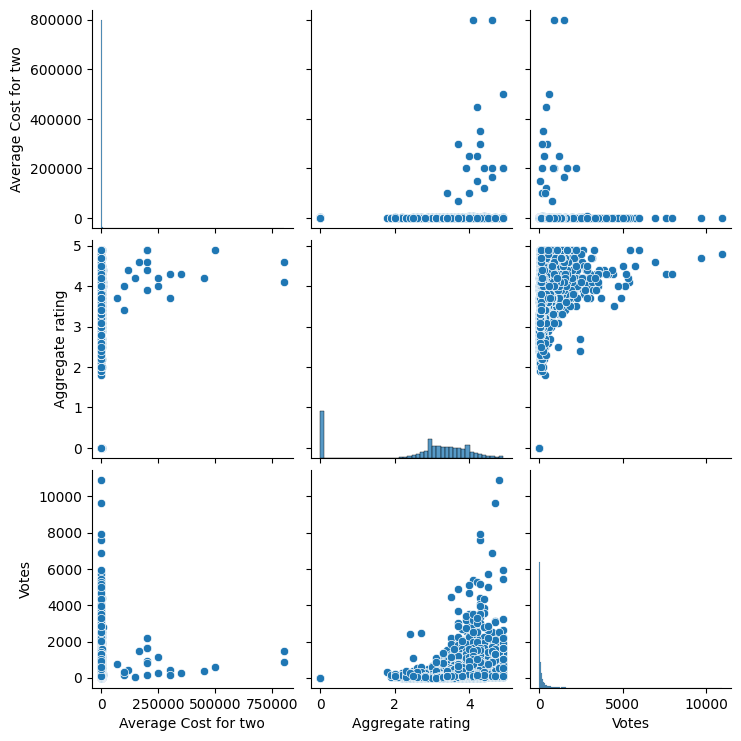

In [26]:
sns.pairplot(df[["Average Cost for two","Aggregate rating", "Votes"]])

In [29]:
df[["Aggregate rating", "Rating text"]].sort_values(by="Aggregate rating", ascending=True).head(7000)


,Aggregate rating,Rating text
2204,0.0,Not rated
78,0.0,Not rated
77,0.0,Not rated
69,0.0,Not rated
6953,0.0,Not rated
...,...,...
9348,3.6,Good
36,3.6,Good
7017,3.6,Good
7019,3.6,Good


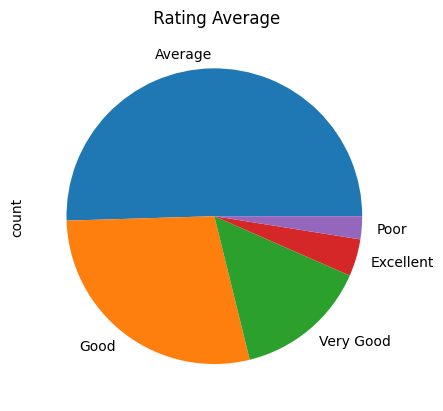

In [44]:
df=df[df["Rating text"] !="Not rated"]
df["Rating text"].value_counts().plot(kind='pie')
plt.title(' Rating Average')
plt.show()

In [45]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [46]:
X = df[
    [
        "Average Cost for two",
        "Has Table booking",
        "Has Online delivery",
        "Price range",

    ]
]

In [47]:
#If:
# above below 2.5 Poor 
#above 2.5 and below 3.5 Average
#above 3.5 and below 4.0 Good
#above 4.0 and below 4.5 Very Good
#above 4.5 Excellent

y = df["Aggregate rating"]

In [48]:
X


,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,Yes,No,3
1,1200,Yes,No,3
2,4000,Yes,No,4
3,1500,No,No,4
4,1500,Yes,No,4
...,...,...,...,...
9546,80,No,No,3
9547,105,No,No,3
9548,170,No,No,4
9549,120,No,No,4


In [50]:
!pip install scikit-learn
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 2.3 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 2.2 MB/s eta 0:00:0000:0100:01
  Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [51]:
X["Has Table booking"] = label_encoder.fit_transform(X["Has Table booking"])

/var/folders/_5/86kkzmcd23g8tgn_xvvl1pl80000gn/T/ipykernel_11424/1160751899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Has Table booking"] = label_encoder.fit_transform(X["Has Table booking"])


In [52]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,No,3
1,1200,1,No,3
2,4000,1,No,4
3,1500,0,No,4
4,1500,1,No,4
...,...,...,...,...
9546,80,0,No,3
9547,105,0,No,3
9548,170,0,No,4
9549,120,0,No,4


In [57]:
X["Has Online delivery"] = label_encoder.fit_transform(X["Has Online delivery"])
X


/var/folders/_5/86kkzmcd23g8tgn_xvvl1pl80000gn/T/ipykernel_11424/328205575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Has Online delivery"] = label_encoder.fit_transform(X["Has Online delivery"])


,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,0,3
1,1200,1,0,3
2,4000,1,0,4
3,1500,0,0,4
4,1500,1,0,4
...,...,...,...,...
9546,80,0,0,3
9547,105,0,0,3
9548,170,0,0,4
9549,120,0,0,4


In [ ]:
#!pip install --upgrade pip
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.0190367 ,  2.37978283, -0.68302371,  1.10671644],
       [-0.0135729 ,  2.37978283, -0.68302371,  1.10671644],
       [ 0.13941344,  2.37978283, -0.68302371,  2.18135204],
       ...,
       [-0.06985002, -0.42020641, -0.68302371,  2.18135204],
       [-0.07258191, -0.42020641, -0.68302371,  2.18135204],
       [-0.07613338, -0.42020641, -0.68302371,  0.03208084]],
      shape=(7403, 4))

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [66]:
def modelresults(predictions):
    print("Mean absolute error on model is {}".format(mean_absolute_error(y_test, predictions)))
    print(
        "Root Mean squared error on model is {}".format(np.sqrt(mean_squared_error(y_test, predictions)))

        )


In [67]:
from  sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [71]:
modelprediction=model.predict(X_test)
modelresults(modelprediction)

Mean absolute error on model is 0.4012400680712769
Root Mean squared error on model is 0.5056738815663485


In [72]:
modelprediction


array([3.22358822, 3.42881105, 3.16382936, ..., 3.22330059, 3.2240676 ,
       3.42852342], shape=(1481,))

In [74]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [75]:
parameters = {"C": [0.001, 0.01, 0.1, 0.5],"kernel": ["linear", "poly", "rbf", "degree", [2,3,4]]}

In [76]:
svrmodel= SVR()
gridsvr = GridSearchCV(svrmodel, parameters)
gridsvr.fit(X_train, y_train)

/Users/richard/Restaurant Ratings Predictor/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/richard/Restaurant Ratings Predictor/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/richard/Restaurant Ratings Predictor/.venv/lib/python3.11/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
  File "/Users/richard/Restaurant Ratings Predictor/.venv/lib/python3.11/site

,estimator,SVR()
,param_grid,"{'C': [0.001, 0.01, ...], 'kernel': ['linear', 'poly', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'rbf'


In [77]:
predsgridsvr = gridsvr.predict(X_test)
modelresults(predsgridsvr)

Mean absolute error on model is 0.386645207067292
Root Mean squared error on model is 0.4947454043653189
